# Projeto 1 - SCC5809 - Redes Neurais e Aprendizado Profundo

## Wine - Classificação

### 1. Bibliotecas necessárias:

In [194]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [195]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
#Geração de gráficos:
import matplotlib.pyplot as plt
#Bibliotecas específicas para o aprendizado de máquina:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

### 2. Extração e Carregamento dos Dados (Etapa Extract and Load)
### Importando o Dataset e Carregando em DataFrame:

In [196]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 

#Criação do DataFrame em Pandas:
X = pd.DataFrame(X)
y = pd.DataFrame(y)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

#### Metadados da Base de Dados:

In [197]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Normalizando a Base de Dados:

In [198]:
escala = StandardScaler()
escala.fit(X)
X_norm = escala.transform(X)

#### Inicializando o Treinamento em uma Rede MLP:

In [199]:
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, y, test_size=0.3) # Treino - 70% e Teste 30%

In [200]:
rna = MLPClassifier(hidden_layer_sizes=(100,50), # Duas camadas - 1ª Camada Intermediária com 100 Neurônios e 2ª com 50.
                    max_iter=2000, # 2000 iterações
                    tol=0.0000001, # Tolerância/erro de 1*10^(-7)
                    learning_rate_init=0.1, # Taxa de aprendizado de 0.1 (inicial)
                    solver='sgd',
                    activation='logistic',
                    learning_rate="constant",
                    verbose=2,
                    momentum=0.9 # Momento de 0.9
                    )

In [201]:
rna.fit(X_norm_train, Y_train)

Iteration 1, loss = 1.18547442
Iteration 2, loss = 1.07311703
Iteration 3, loss = 1.08760504
Iteration 4, loss = 1.08563477
Iteration 5, loss = 1.07024824
Iteration 6, loss = 1.06443581
Iteration 7, loss = 1.06246539
Iteration 8, loss = 1.05959776
Iteration 9, loss = 1.05633100
Iteration 10, loss = 1.05312805
Iteration 11, loss = 1.04977696
Iteration 12, loss = 1.04615713
Iteration 13, loss = 1.04227539
Iteration 14, loss = 1.03810941
Iteration 15, loss = 1.03361088
Iteration 16, loss = 1.02873415
Iteration 17, loss = 1.02342980
Iteration 18, loss = 1.01763666
Iteration 19, loss = 1.01128256
Iteration 20, loss = 1.00428533
Iteration 21, loss = 0.99655141
Iteration 22, loss = 0.98797425
Iteration 23, loss = 0.97843323
Iteration 24, loss = 0.96779298
Iteration 25, loss = 0.95590281
Iteration 26, loss = 0.94259683
Iteration 27, loss = 0.92769504
Iteration 28, loss = 0.91100605
Iteration 29, loss = 0.89233197
Iteration 30, loss = 0.87147635
Iteration 31, loss = 0.84825585
Iteration 32, los

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 37, loss = 0.65551621
Iteration 38, loss = 0.61588611
Iteration 39, loss = 0.57525146
Iteration 40, loss = 0.53427211
Iteration 41, loss = 0.49362929
Iteration 42, loss = 0.45396813
Iteration 43, loss = 0.41584898
Iteration 44, loss = 0.37971613
Iteration 45, loss = 0.34588616
Iteration 46, loss = 0.31455245
Iteration 47, loss = 0.28579982
Iteration 48, loss = 0.25962364
Iteration 49, loss = 0.23594948
Iteration 50, loss = 0.21465175
Iteration 51, loss = 0.19557036
Iteration 52, loss = 0.17852531
Iteration 53, loss = 0.16332870
Iteration 54, loss = 0.14979412
Iteration 55, loss = 0.13774337
Iteration 56, loss = 0.12701068
Iteration 57, loss = 0.11744499
Iteration 58, loss = 0.10891062
Iteration 59, loss = 0.10128685
Iteration 60, loss = 0.09446699
Iteration 61, loss = 0.08835699
Iteration 62, loss = 0.08287407
Iteration 63, loss = 0.07794533
Iteration 64, loss = 0.07350655
Iteration 65, loss = 0.06950103
Iteration 66, loss = 0.06587873
Iteration 67, loss = 0.06259545
Iteratio

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50),
              learning_rate_init=0.1, max_iter=2000, solver='sgd', tol=1e-07,
              verbose=2)

In [202]:
Y_rna_previsao = rna.predict(X_norm_test)

In [203]:
r2 = r2_score(Y_test, Y_rna_previsao)
print(r2)

0.9729594391587381


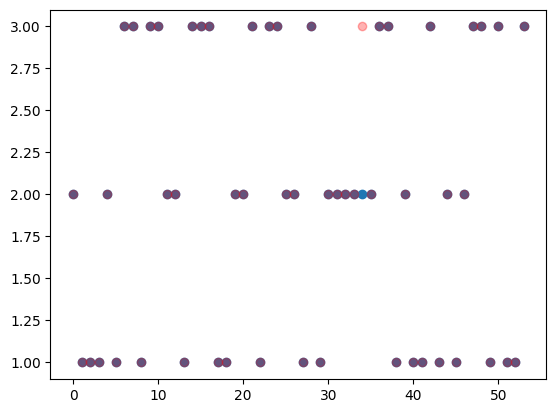

In [204]:
x_i = [x for x in range(len(Y_test))]
plt.scatter(x_i, Y_test)
plt.scatter(x_i, Y_rna_previsao, alpha=0.3, color="Red")

## Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html